In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
test_df = pd.read_csv('./adult.data_converted.csv')
test_df.drop(32561, axis=0, inplace=True)

In [3]:
test_df.head(10)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_more_than_50K
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0.0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0.0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0.0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0.0
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,0.0
6,49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,0.0
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,1.0
8,31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,1.0
9,42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,1.0


In [4]:
print(test_df.columns)

Index(['age', 'work-class', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'is_more_than_50K'],
      dtype='object')


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               32561 non-null  float64
 1   work-class        30725 non-null  object 
 2   fnlwgt            32561 non-null  float64
 3   education         32561 non-null  object 
 4   education-num     32561 non-null  float64
 5   marital-status    32561 non-null  object 
 6   occupation        30718 non-null  object 
 7   relationship      32561 non-null  object 
 8   race              32561 non-null  object 
 9   sex               32561 non-null  object 
 10  capital-gain      32561 non-null  float64
 11  capital-loss      32561 non-null  float64
 12  hours-per-week    32561 non-null  float64
 13  native-country    31978 non-null  object 
 14  is_more_than_50K  32561 non-null  float64
dtypes: float64(7), object(8)
memory usage: 4.0+ MB


In [6]:
print('데이터 세트 Null 값 갯수 \n',test_df.isnull().sum())

데이터 세트 Null 값 갯수 
 age                    0
work-class          1836
fnlwgt                 0
education              0
education-num          0
marital-status         0
occupation          1843
relationship           0
race                   0
sex                    0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country       583
is_more_than_50K       0
dtype: int64


In [7]:
test_df.drop(['capital-gain','capital-loss','native-country','fnlwgt'], axis=1, inplace=True)

In [8]:
test_df_dropna = test_df#.dropna(axis = 0)

In [9]:
print('데이터 세트 Null 값 갯수 \n',test_df_dropna.isnull().sum())

데이터 세트 Null 값 갯수 
 age                    0
work-class          1836
education              0
education-num          0
marital-status         0
occupation          1843
relationship           0
race                   0
sex                    0
hours-per-week         0
is_more_than_50K       0
dtype: int64


In [10]:
test_df_dropna.describe()

,age,education-num,hours-per-week,is_more_than_50K
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456,0.240810
std,13.640433,2.572720,12.347429,0.427581
min,17.000000,1.000000,1.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000
75%,48.000000,12.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000


## 칼럼별 히스토그램

<AxesSubplot:xlabel='work-class', ylabel='is_more_than_50K'>

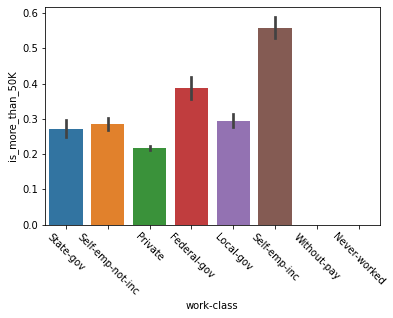

In [11]:
plt.xticks(rotation = - 45 )
sns.barplot(x='work-class', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='sex', ylabel='is_more_than_50K'>

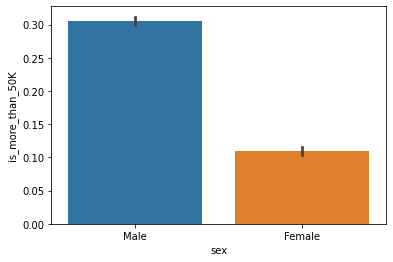

In [12]:
sns.barplot(x='sex', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='education-num', ylabel='is_more_than_50K'>

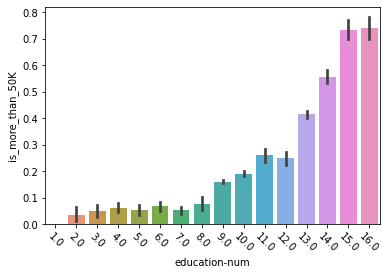

In [13]:
plt.xticks(rotation = - 45)
sns.barplot(x='education-num', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='race', ylabel='is_more_than_50K'>

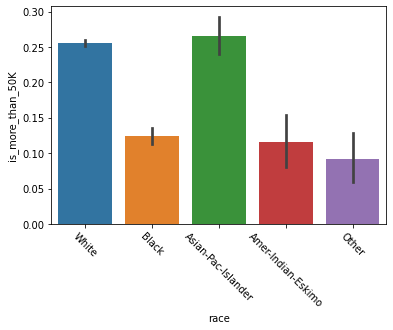

In [14]:
plt.xticks(rotation = - 45 )
sns.barplot(x='race', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='marital-status', ylabel='is_more_than_50K'>

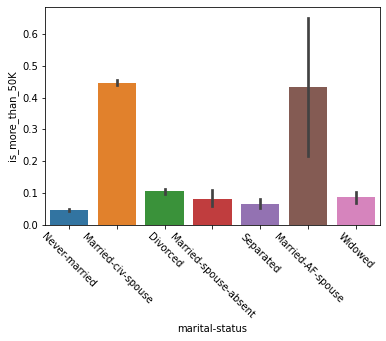

In [15]:
plt.xticks(rotation = - 45 )
sns.barplot(x='marital-status', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='occupation', ylabel='is_more_than_50K'>

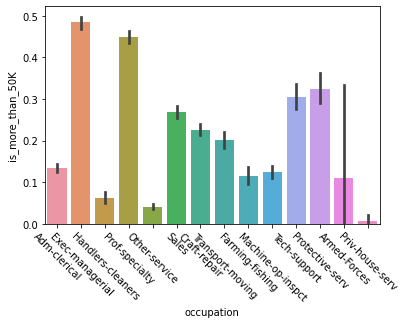

In [16]:
plt.xticks(rotation = - 45 )
sns.barplot(x='occupation', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='relationship', ylabel='is_more_than_50K'>

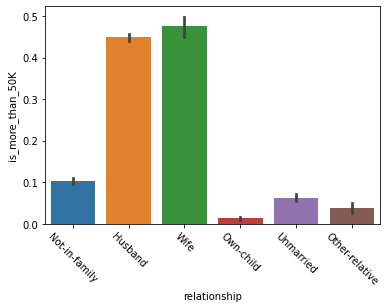

In [17]:
plt.xticks(rotation = - 45 )
sns.barplot(x='relationship', y = 'is_more_than_50K', data=test_df_dropna)